In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import os

#### Load data

In [23]:
data = pd.read_csv(r'Data\USA_Housing.csv')

In [25]:
data.isnull().any().any()

False

#### EDA

In [3]:
# Set the display format to non-scientific notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.00,5000.00,5000.00,5000.00,5000.00,5000.00
mean,68583.11,5.98,6.99,3.98,36163.52,1232072.65
std,10657.99,0.99,1.01,1.23,9925.65,353117.63
min,17796.63,2.64,3.24,2.00,172.61,15938.66
25%,61480.56,5.32,6.30,3.14,29403.93,997577.14
50%,68804.29,5.97,7.00,4.05,36199.41,1232669.38
75%,75783.34,6.65,7.67,4.49,42861.29,1471210.20
max,107701.75,9.52,10.76,6.50,69621.71,2469065.59


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
data.drop('Address', axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


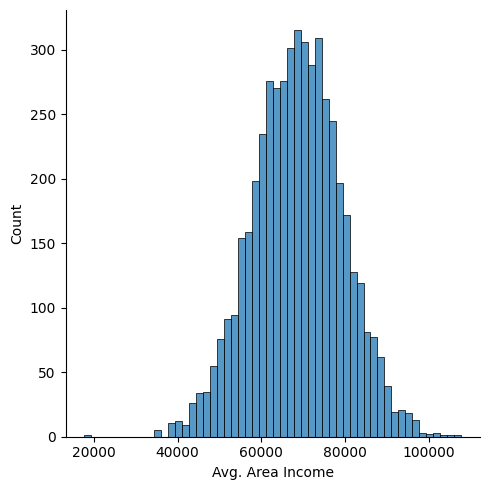

In [6]:
sns.displot(data['Avg. Area Income'])

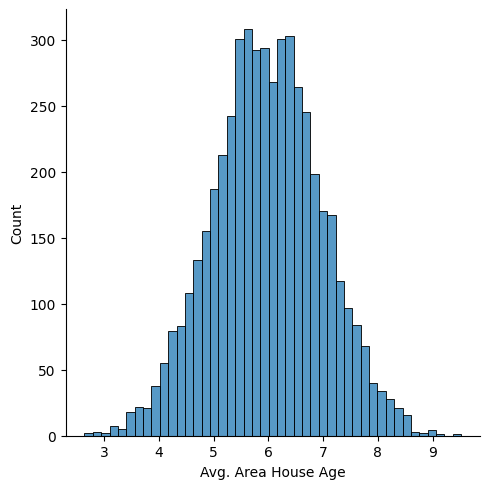

In [7]:
sns.displot(data['Avg. Area House Age'])

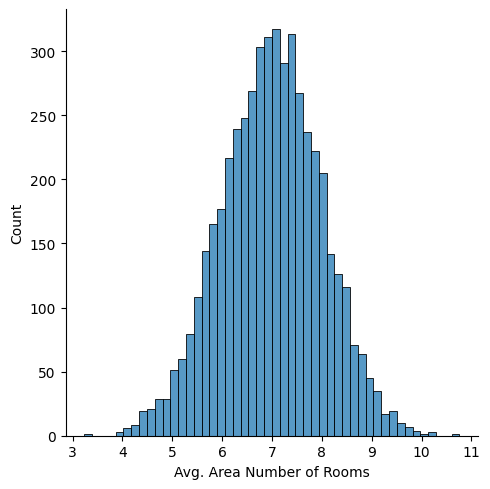

In [8]:
sns.displot(data['Avg. Area Number of Rooms'])

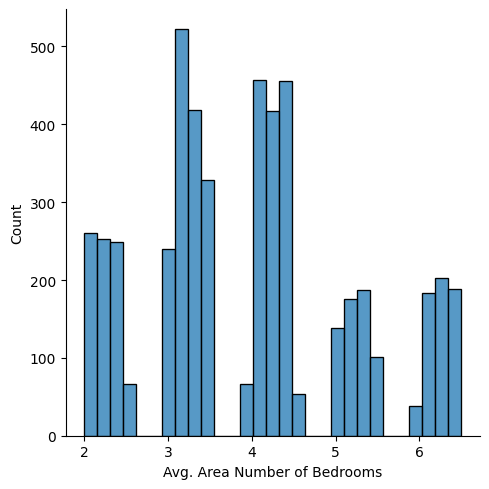

In [9]:
sns.displot(data['Avg. Area Number of Bedrooms'])

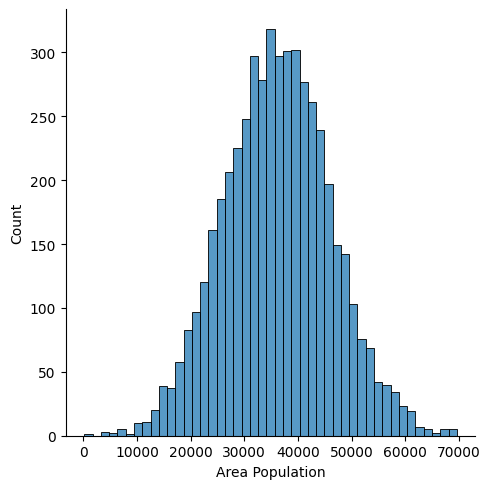

In [10]:
sns.displot(data['Area Population'])

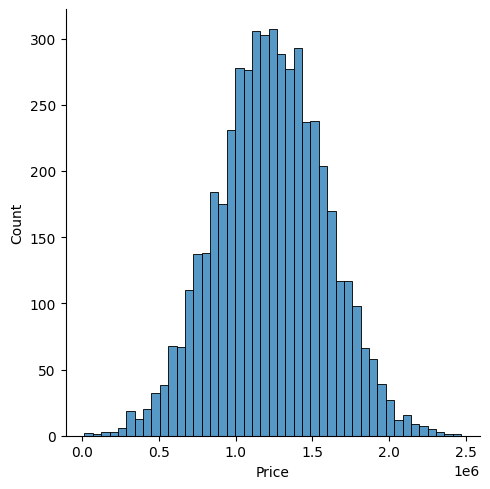

In [11]:
sns.displot(data['Price'])

In [12]:
#skewness and kurtosis
print("Skewness: %f" % data['Price'].skew())
print("Kurtosis: %f" % data['Price'].kurt())

Skewness: -0.002718
Kurtosis: -0.054918


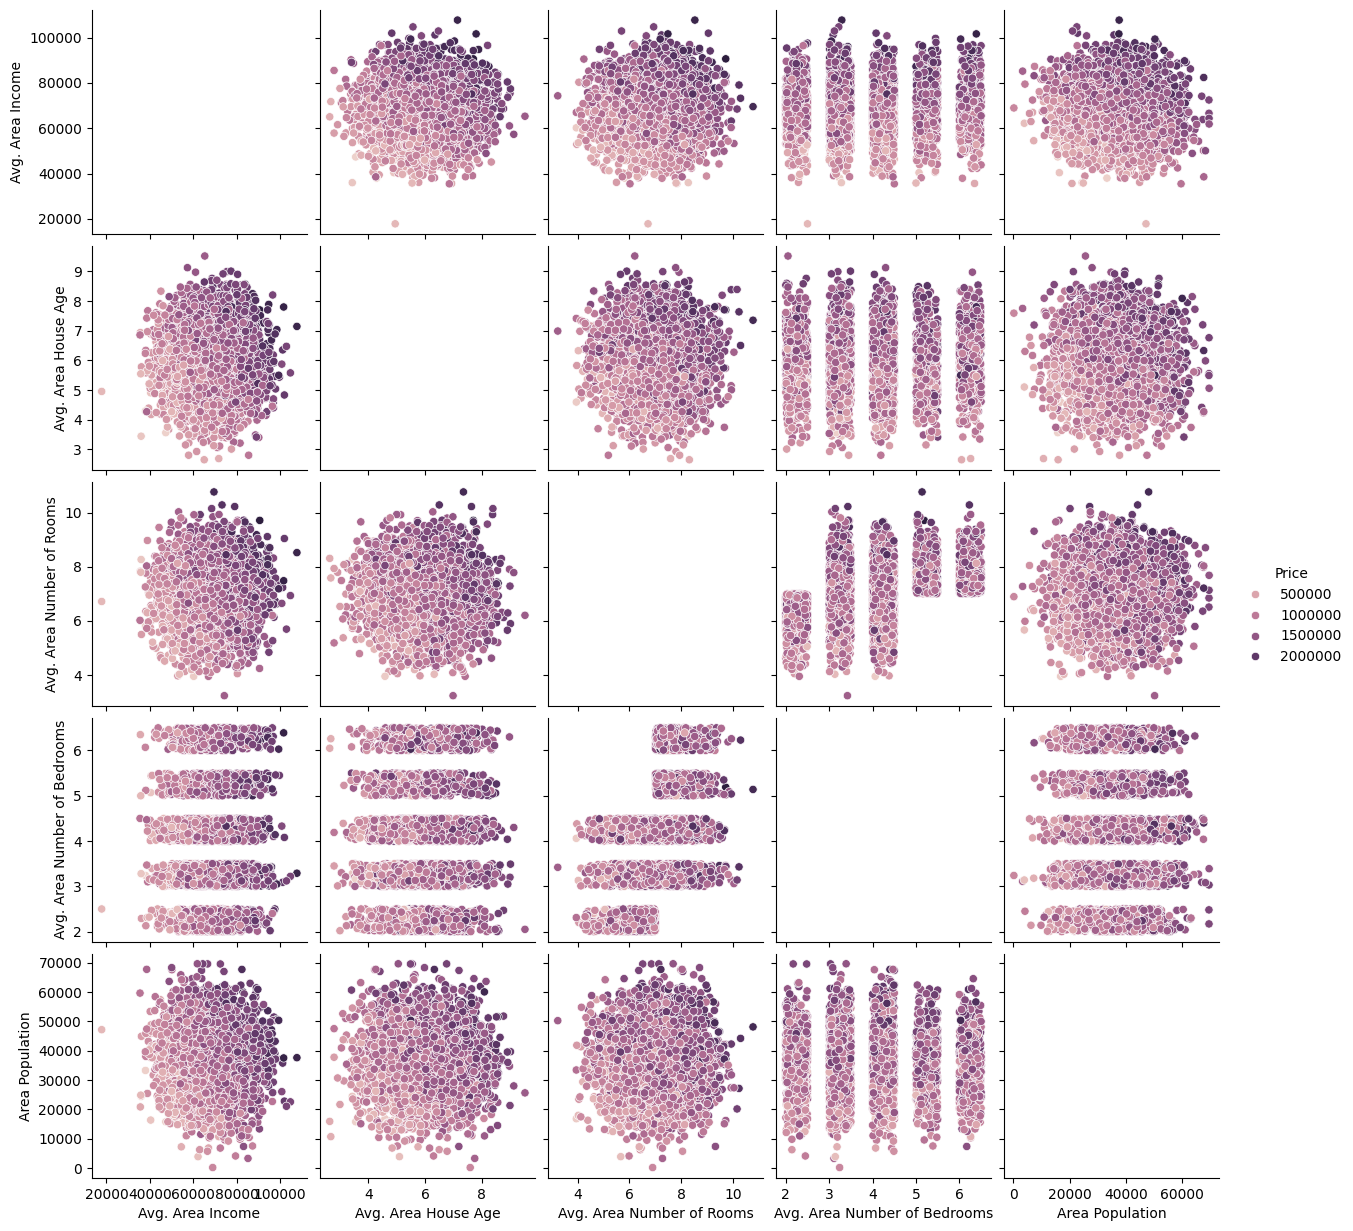

In [13]:
sns.pairplot(data, hue='Price')
plt.show()

In [14]:
data['Price'].describe()

count      5000.00
mean    1232072.65
std      353117.63
min       15938.66
25%      997577.14
50%     1232669.38
75%     1471210.20
max     2469065.59
Name: Price, dtype: float64

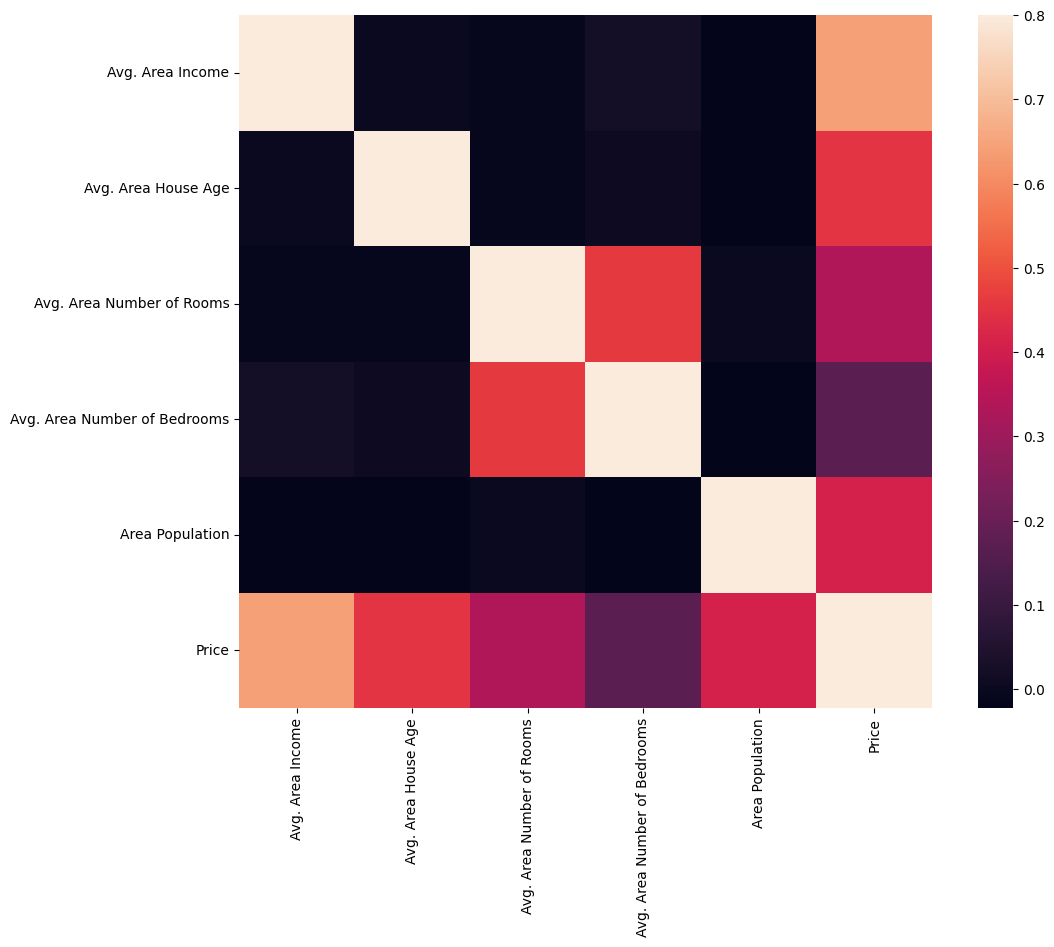

In [15]:
#correlation matrix
corrmat = data.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

#### Remove features

In [16]:
target = data['Price'].values
data = data.drop(['Price'], axis=1)
feature = data.values

#### Split data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, test_size=0.2, random_state=42)

#### Train model

In [18]:
reg = LinearRegression(fit_intercept=True)
model = reg.fit(X_train, y_train)

#### Predict on test data

In [19]:
prediction = model.predict(X_test)

#### Metrics

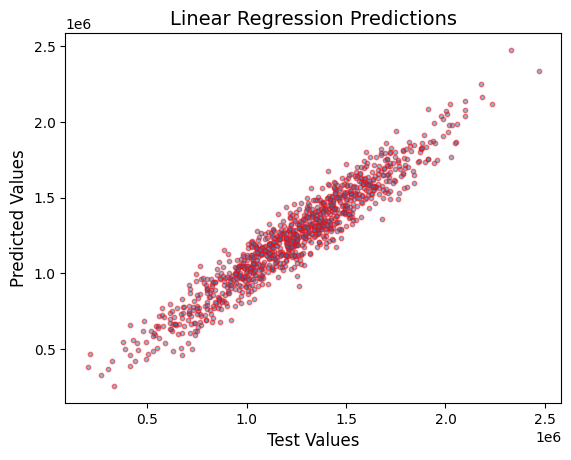

In [20]:
# Create a figure and axis
fig, ax = plt.subplots()

# Scatter plot with improved aesthetics
ax.scatter(y_test, prediction, alpha=0.5, edgecolors='r', s=10)

# Set plot title and labels
ax.set_title('Linear Regression Predictions', fontsize=14)
ax.set_xlabel('Test Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)

# Show the plot
plt.show()


In [21]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

r2 = r2_score(y_test, prediction)
print(f'R^2 Score: {r2}')

mae = mean_absolute_error(y_test, prediction)
print(f'Mean Absolute Error: {mae}')

mse = mean_squared_error(y_test, prediction)
print(f'Mean Squared Error: {mse}')

rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

mape = np.mean(np.abs((y_test - prediction) / y_test)) * 100
print(f'Mean Absolute Percentage Error: {mape}%')


R^2 Score: 0.9179971706834602
Mean Absolute Error: 80879.09723486958
Mean Squared Error: 10089009300.890663
Root Mean Squared Error: 100444.06055556826
Mean Absolute Percentage Error: 7.387838859753246%
